<a href="https://colab.research.google.com/github/wanutchapornmun/229352-StatisticalLearning/blob/main/Lab05_decision_tree_bagging_RF_660510561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [1]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("https://donlapark.pages.dev/229352/heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [3]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [8]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

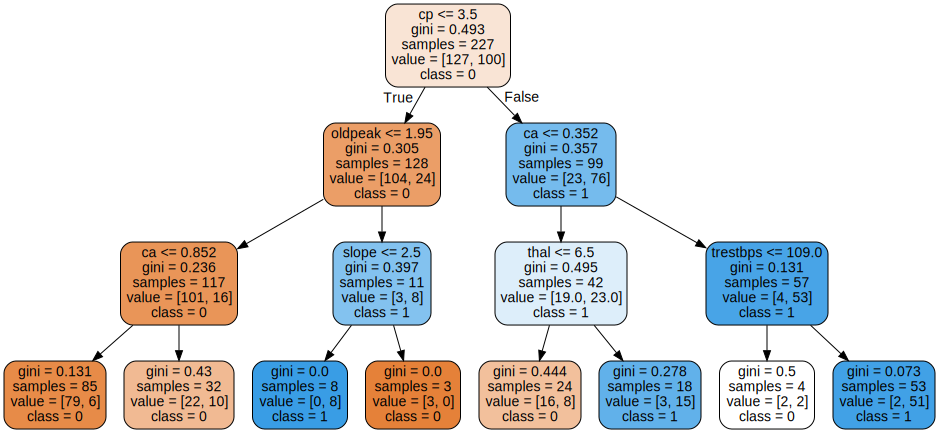

In [4]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,

                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph # ผลลัพธ์ที่ได้ของแต่ละคนจะไม่เหมือนกัน เพราะเป็น การสุ่ม

In [5]:
from sklearn.metrics import classification_report

ypred = gridcv.predict(X_test)

print(classification_report(y_test, ypred)) # เป็นการบอกว่าต้นไม้ด้านบนมีความแม่นยำเท่าไหร่

              precision    recall  f1-score   support

           0       0.74      0.86      0.80        37
           1       0.85      0.72      0.78        39

    accuracy                           0.79        76
   macro avg       0.80      0.79      0.79        76
weighted avg       0.80      0.79      0.79        76



## Bagged decision trees (การสุ่มข้อมูลใหม่หลายๆครั้ง)
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [6]:
clf = DecisionTreeClassifier()

bagged_trees = BaggingClassifier(clf, n_estimators=100, max_samples=X_train.shape[0], max_features=5) # สุ่มมา 100 ครั้ง

bagged_trees.fit(X_train, y_train)

ypred_bt = bagged_trees.predict(X_test)

print(classification_report(y_test, ypred_bt))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        37
           1       0.91      0.74      0.82        39

    accuracy                           0.83        76
   macro avg       0.84      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [7]:
rf = RandomForestClassifier(n_estimators=200) # randomforest ถือว่าเป็น...ที่ดีในการทำ reggression

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
pipe_dt = Pipeline([
    ('dt', DecisionTreeClassifier())])

params_dt = {
    'dt__max_depth': [3, 6, 9],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 5]}

In [13]:
grid_dt = GridSearchCV(
    pipe_dt,
    par
    ams_dt,
    scoring='f1_macro',
    cv=5
)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [3, 6, 9],
                         'dt__min_samples_leaf': [1, 2, 5],
                         'dt__min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [17]:
from sklearn.metrics import f1_score, accuracy_score

y_pred_dt = grid_dt.predict(X_test)

dt_f1 = f1_score(y_test, y_pred_dt, average='macro')
dt_acc = accuracy_score(y_test, y_pred_dt)

print("Decision Tree")
print("Best params:", grid_dt.best_params_)
print("F1_macro:", dt_f1)
print("Accuracy:", dt_acc)

Decision Tree
Best params: {'dt__max_depth': 3, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 2}
F1_macro: 0.8146341463414635
Accuracy: 0.8157894736842105


In [21]:
pipe_bag = Pipeline([
    ('bag', BaggingClassifier(
        estimator=DecisionTreeClassifier()))
])

In [22]:
params_bag = {
    'bag__n_estimators': [50, 100, 150],
    'bag__max_samples': [0.6, 0.8, 1.0],
    'bag__max_features': [0.5, 0.8, 1.0]}

grid_bag = GridSearchCV(
    pipe_bag,
    params_bag,
    scoring='f1_macro',
    cv=5
)

grid_bag.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bag',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))]),
             param_grid={'bag__max_features': [0.5, 0.8, 1.0],
                         'bag__max_samples': [0.6, 0.8, 1.0],
                         'bag__n_estimators': [50, 100, 150]},
             scoring='f1_macro')

In [23]:
y_pred_bag = grid_bag.predict(X_test)

bag_f1 = f1_score(y_test, y_pred_bag, average='macro')
bag_acc = accuracy_score(y_test, y_pred_bag)

print("Bagged Decision Trees")
print("Best params:", grid_bag.best_params_)
print("F1_macro:", bag_f1)
print("Accuracy:", bag_acc)

Bagged Decision Trees
Best params: {'bag__max_features': 0.5, 'bag__max_samples': 0.8, 'bag__n_estimators': 150}
F1_macro: 0.8286804230969308
Accuracy: 0.8289473684210527


In [24]:
pipe_rf = Pipeline([
    ('rf', RandomForestClassifier())])

In [27]:
params_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 6, 12],
    'rf__max_features': ['sqrt', 'log2']}

grid_rf = GridSearchCV(
    pipe_rf,
    params_rf,
    scoring='f1_macro',
    cv=5
)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 6, 12],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__n_estimators': [100, 200]},
             scoring='f1_macro')

In [28]:
y_pred_rf = grid_rf.predict(X_test)

rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
rf_acc = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest")
print("Best params:", grid_rf.best_params_)
print("F1_macro:", rf_f1)
print("Accuracy:", rf_acc)


Random Forest
Best params: {'rf__max_depth': None, 'rf__max_features': 'log2', 'rf__n_estimators': 100}
F1_macro: 0.8411149825783972
Accuracy: 0.8421052631578947




# **Ans**
โมเดลที่ดีที่สุด คือ โมเดลของ Random Forest (f1_macro = 0.8411149825783972)


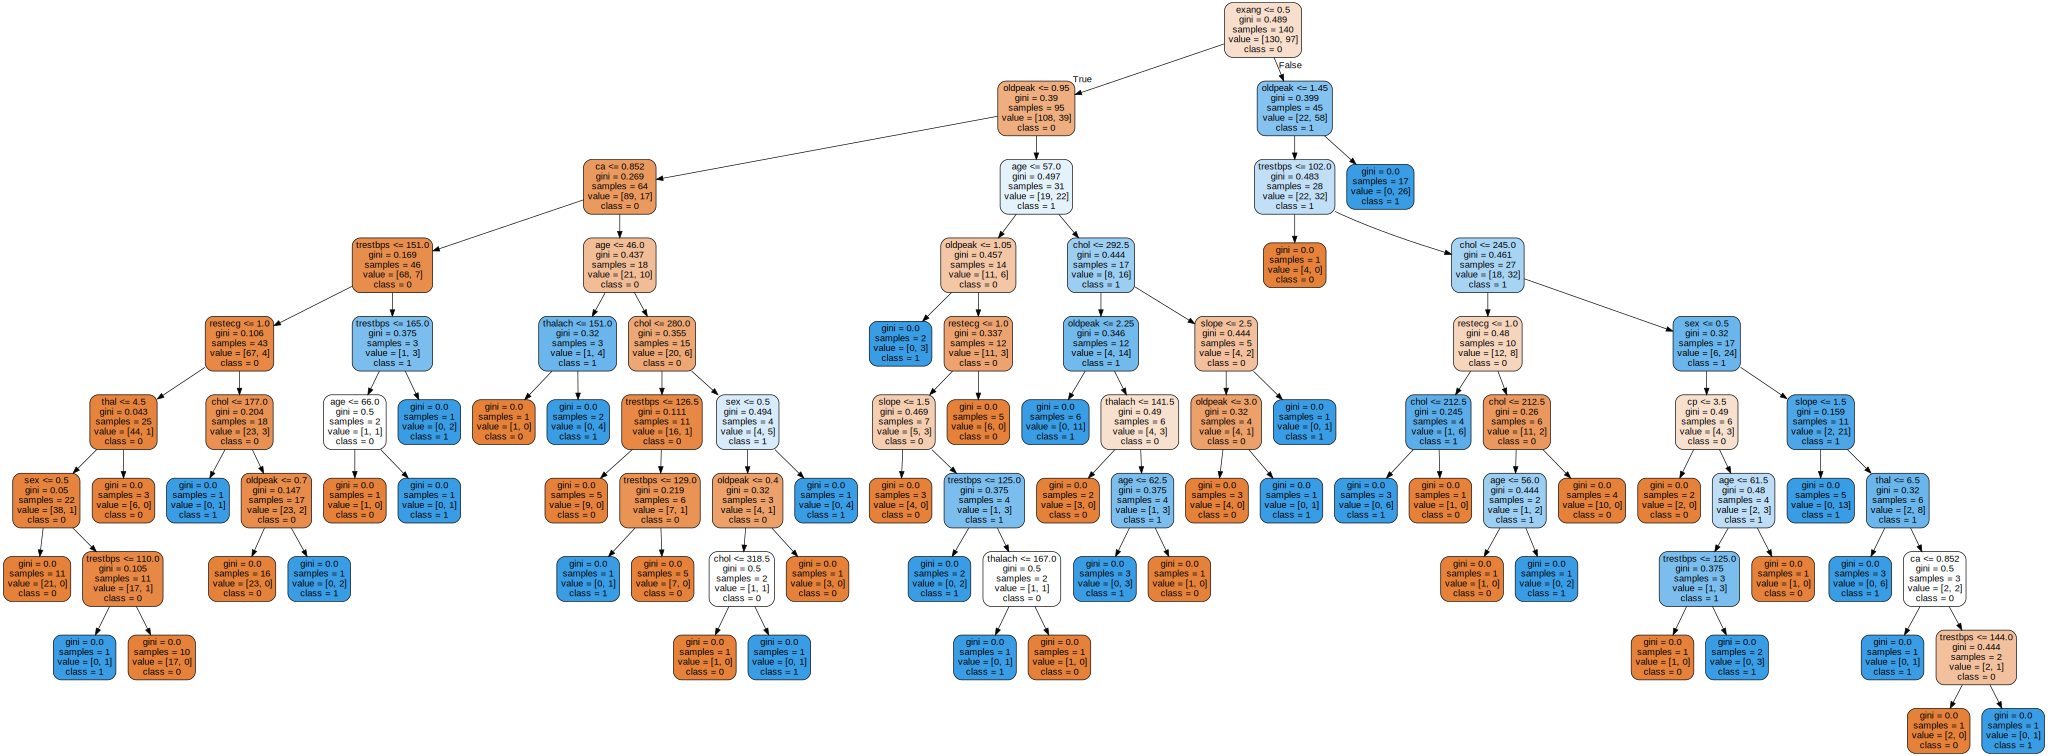

In [31]:
rf_model = grid_rf.best_estimator_.named_steps['rf']
tree = rf_model.estimators_[0]

plot_data = export_graphviz(
    tree,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=data.columns[:-1],
    class_names=['0', '1']
)

graph = graphviz.Source(plot_data)
graph